#3.1

853


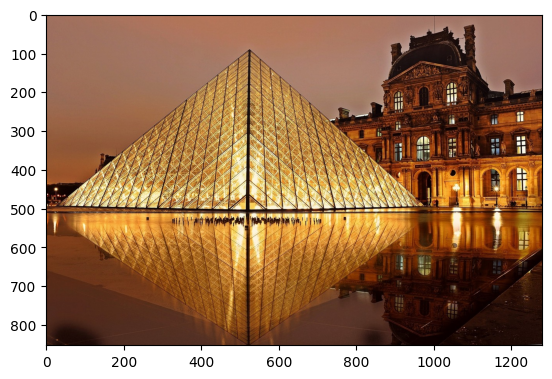

In [54]:

import numpy as np
import matplotlib.pyplot as plt
import math
louvre=plt.imread('Louvre.jpg')
plt.imshow(louvre)
# TOP LEFT CORNER
corner1 = louvre[0][0]
# TOP RIGHT CORNER
corner2 = louvre[0][len(louvre[0])-1]
# BOTTOM LEFT CORNER
corner3 = louvre[len(louvre)-1][0]
# BOTTOM RIGHT CORNER
corner4 = louvre[len(louvre)-1][len(louvre[0])-1]
print(len(louvre))

3.2

In [18]:
def get_center_of_image_and_the_colors(image):
    x = len(image)//2
    y = len(image[0])//2
    center_colors = image[x][y]
    return center_colors, x, y

print(get_center_of_image_and_the_colors(louvre))

(array([120,  65,  26], dtype=uint8), 426, 640)


3.3

In [19]:
def translation(vecteur, point):
    point_array = np.array(point)
    vecteur_array = np.array(vecteur)
    translated_point = point_array + vecteur_array
    return tuple(translated_point)

3.4

In [34]:
def homothetie(centre, rapport, point):
    centre_array = np.array(centre)
    point_array = np.array(point)
    homothetic_point = centre_array + rapport * (point_array - centre_array)
    return tuple(homothetic_point)

result = homothetie((0,0), 2, (1,0))
print(result)


(2, 0)


3.5

In [21]:
def matrice_rotation(angle):
    radian = math.radians(angle)
    cos_a = math.cos(radian)
    sin_a = math.sin(radian)
    rotation_matrix = np.array([[cos_a, -sin_a], [sin_a, cos_a]])
    return rotation_matrix
    

3.6

In [22]:
def rotation(centre, angle, point):
    rotation_mat = matrice_rotation(angle)
    centre_array = np.array(centre)
    point_array = np.array(point)
    rotated_point = np.dot(rotation_mat, point_array - centre_array) + centre_array
    return tuple(rotated_point)


3.7

In [51]:
def symetrie(point, coefficients_droite):
    a, b, c = coefficients_droite
    d = a * point[0] + b * point[1] + c
    factor = -2 * d / (a**2 + b**2)
    x_sym = point[0] + a * factor
    y_sym = point[1] + b * factor
    return (x_sym, y_sym)




3.8

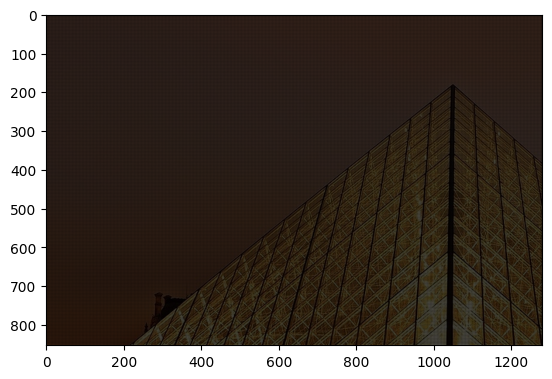

In [64]:
def homothetie_image_matplotlib(image, rapport, centre):
    height, width, _ = image.shape
    new_image = np.zeros_like(image)

    for x in range(width):
        for y in range(height):
            # Apply homothetie transformation to each pixel
            xx, yy = translation((x, y), (-centre[0], -centre[1]))
            new_x, new_y = homothetie(centre, rapport, (x, y))
            new_x, new_y = int(round(new_x)), int(round(new_y))
            result_x, result_y = translation((new_x, new_y), (centre[0], centre[1]))
            if 0 <= result_x < width and 0 <= result_y < height:
                new_image[result_y, result_x] = image[y, x]

    return new_image

new_image = homothetie_image_matplotlib(louvre, 2, (0, 0))
plt.imshow(new_image)

3.9

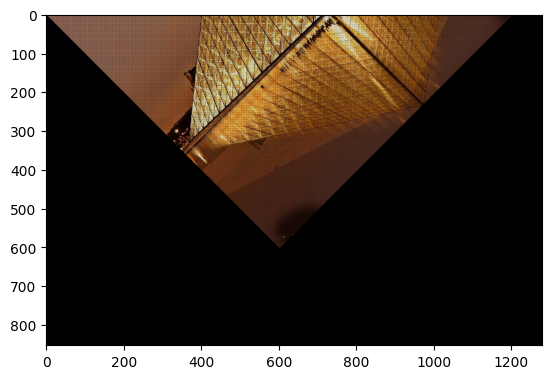

In [63]:
def rotation_image_matplotlib(image, angle, centre):
    height, width, _ = image.shape
    new_image = np.zeros_like(image)

    for x in range(width):
        for y in range(height):
            # Apply rotation transformation to each pixel
            xx, yy = translation((x, y), (-centre[0], -centre[1]))
            new_x, new_y = rotation(centre, -angle, (xx, yy))
            new_x, new_y = int(round(new_x)), int(round(new_y))
            result_x, result_y = translation((new_x, new_y), (centre[0], centre[1]))
            if 0 <= result_x < width and 0 <= result_y < height:
                new_image[result_y, result_x] = image[y, x]

    return new_image

new_image = rotation_image_matplotlib(louvre, 45, (0,0))
plt.imshow(new_image)

3.10

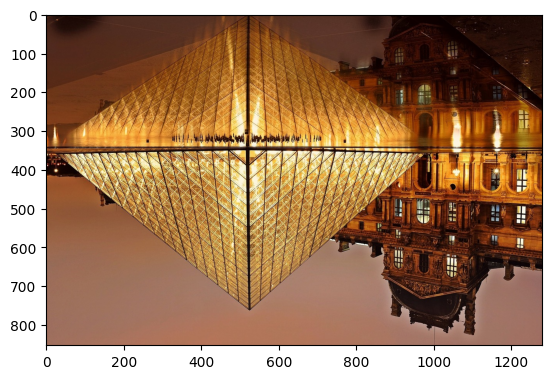

In [55]:
def symetrie_image(image, coefficients_droite):
    height, width, _ = image.shape
    new_image = np.zeros_like(image)

    for x in range(width):
        for y in range(height):
            # Apply symmetry transformation to each pixel
            xx, yy = translation((x, y), (-coefficients_droite[0], -coefficients_droite[1]))
            new_x, new_y = symetrie((xx, yy), coefficients_droite)
            new_x, new_y = int(round(new_x)), int(round(new_y))
            result_x, result_y = translation((new_x, new_y), (coefficients_droite[0], coefficients_droite[1]))
            if 0 <= result_x < width and 0 <= result_y < height:
                new_image[result_y, result_x] = image[y, x]
    return new_image

new_image = symetrie_image(louvre, (0,853//2,-(853//2)))
plt.imshow(new_image)

